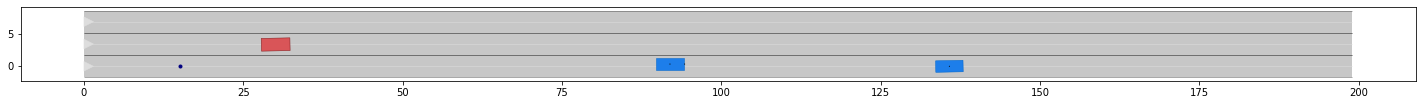

In [5]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from IPython import display
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

path_file = "../../scenarios/tutorial/ZAM_Tutorial-1_2_T-2.xml"

scenario, planning_problem_set = CommonRoadFileReader(path_file).open()

# plot the scenario for each time step
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()



In [17]:


try:
    import matplotlib.pyplot as plt
except ImportError:
    print('Matplotlib not installed. Please use pip(3) to install required package!')

try:
    import numpy as npy
except ImportError:
    print('Numpy not installed. Please use pip(3) to install required package!')

try:
    import vehiclemodels
except ImportError:
    print('commonroad-vehicle-models not installed. Please use pip install to install required package!')
   
try:
    import pkg_resources
    pkg_resources.require("scipy>=1.1.0")
    pkg_resources.require("cvxpy>=1.1.0")
    from cvxpy import *
except ImportError:
    print('CVXPy not installed or wrong version. Please use pip(3) to install required package!')

class TIConstraints:
    a_min = -8
    a_max = 15
    s_min = 0
    s_max = 150
    v_min = 0
    v_max = 35
    j_min = -30
    j_max = 30
    
def plot_state_vector(x : Variable, c : TIConstraints, s_obj = None):
    plt.figure(figsize=(10,10))
    N = x.shape[1]-1
    s_max = npy.maximum(150,100+0*npy.ceil(npy.amax((x.value)[0,:].flatten())*1.1/10)*10)

    # Plot (x_t)_1.
    plt.subplot(4,1,1)
    x1 = (x.value)[0,:].flatten()
    plt.plot(npy.array(range(N+1)),x1,'g')
    if s_obj is not None:
        plt.plot(npy.array(range(1,N+1)),s_obj[0],'b')
        plt.plot(npy.array(range(1,N+1)),s_obj[1],'r')
    plt.ylabel(r"$s$", fontsize=16)
    plt.yticks(npy.linspace(c.s_min, s_max, 3))
    plt.ylim([c.s_min, s_max])
    plt.xticks([])

    # Plot (x_t)_2.
    plt.subplot(4,1,2)
    x2 = (x.value)[1,:].flatten()
    plt.plot(npy.array(range(N+1)),x2,'g')
    plt.yticks(npy.linspace(c.v_min,c.v_max,3))
    plt.ylim([c.v_min, c.v_max+2])
    plt.ylabel(r"$v$", fontsize=16)
    plt.xticks([])

    # Plot (x_t)_3.
    plt.subplot(4,1,3)
    x2 = (x.value)[2,:].flatten()
    plt.plot(npy.array(range(N+1)),x2,'g')
    plt.yticks(npy.linspace(c.a_min,c.a_max,3))
    plt.ylim([c.a_min, c.a_max+2])
    plt.ylabel(r"$a$", fontsize=16)
    plt.xticks([])

DistributionNotFound: The 'cvxpy>=1.1.0' distribution was not found and is required by the application